In [140]:

import pandas as pd
data=pd.read_csv('../DATA/turnover.csv')


#retreiving the general info of the dataset


print(data.head(5))
data.info()

print(data.sales.unique())
print(data.salary.unique())





   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In [141]:
#recoding the ordinal variable 'salary' as a numerical variable with values 0-2 

data.salary=data.salary.astype('category')
data.salary=data.salary.cat.reorder_categories(['low','medium','high'])
data.salary=data.salary.cat.codes


#creating dummy variables for the departments

departments=pd.get_dummies(data.sales)

#dropping one dummy variable to avoid dummy trap
departments=departments.drop('IT',axis=1)


print (departments.head(5))

#dropping the old 'sales' column, which was the categorical variable with al the departments.

data=data.drop('sales',axis=1)


#merging the dummy dataframe with the original datframe with all the variables.
data=data.join(departments)
print (data.head(5))


   RandD  accounting  hr  management  marketing  product_mng  sales  support  \
0      0           0   0           0          0            0      1        0   
1      0           0   0           0          0            0      1        0   
2      0           0   0           0          0            0      1        0   
3      0           0   0           0          0            0      1        0   
4      0           0   0           0          0            0      1        0   

   technical  
0          0  
1          0  
2          0  
3          0  
4          0  
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37        

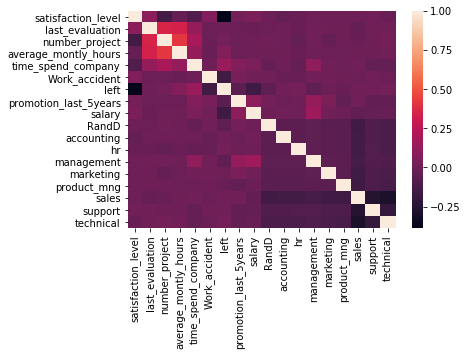

In [128]:
#Correlation matrix for all variables.

import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = data.corr()
sns.heatmap(corr_matrix,)
plt.show()

In [129]:
# calculating percentage of attrition in our dataset.

emp_left=sum(data.left)
print(emp_left)
total_employees=len(data)

print('total employees')

print(emp_left/total_employees*100)
print((total_employees-emp_left)/total_employees*100)

3571
total employees
23.80825388359224
76.19174611640777


In [130]:
#separating target and features as 2 different objects to be called afterwards.

target=data.left
features=data.drop('left',axis=1)




In [131]:
# Importing the function for splitting dataset into train and test
from sklearn.model_selection import train_test_split

# Using that function to create the splits both for target and for features
# Setting the test sample to be 25% of your observations
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25,random_state=42)

In [132]:
# Import linear_model from sklearn.
from sklearn import linear_model


# Create a logistic regression model logreg and fit it to the data.
logreg = linear_model.LogisticRegression()
logreg.fit(features_train,target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [138]:


# Assign the coefficients to a list coef

predictors = features.columns.values
coef = logreg.coef_
for p,c in zip(predictors,list(coef[0])):
    print(p + '.....................' + str(c))
    
# Assign the intercept to the variable intercept
intercept = logreg.intercept_
print(intercept)


satisfaction_level.....................-4.15942157715404
last_evaluation.....................0.6379667895458496
number_project.....................-0.297444879118595
average_montly_hours.....................0.004728359267817376
time_spend_company.....................0.2590435982608431
Work_accident.....................-1.4908984975407562
promotion_last_5years.....................-1.0180551739701098
salary.....................-0.6639001683055316
RandD.....................-0.5457939131670667
accounting.....................0.1222313425130291
hr.....................0.42856991419107976
management.....................-0.35549602915997847
marketing.....................0.19094504764382667
product_mng.....................0.0740479843964619
sales.....................0.14263384746921653
support.....................0.18167671275260142
technical.....................0.2382584484433445
[0.31601137]
